<a href="https://colab.research.google.com/github/hr7657316/CODE-A-HAUNT-hackathon-/blob/main/Computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

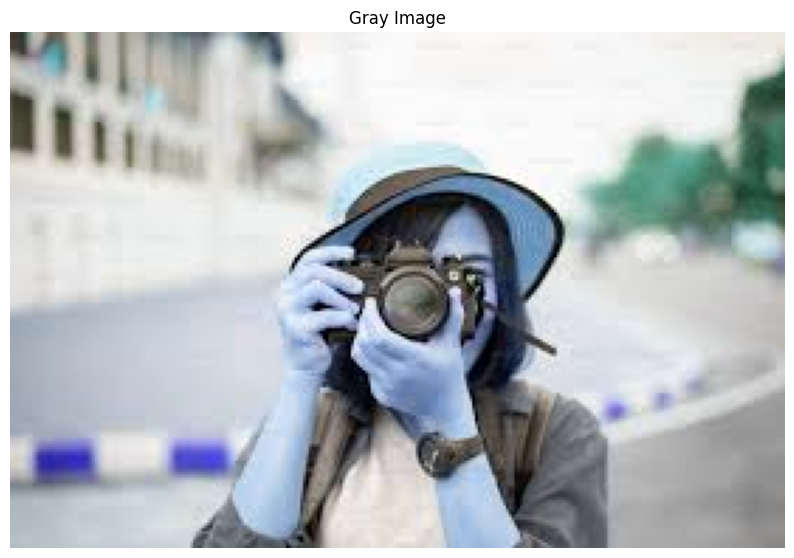

In [ ]:
import cv2
image = cv2.imread("/content/sample_data/images.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)
#from google.colab.patches import cv2_imshow
#cv2_imshow(gray_image)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()



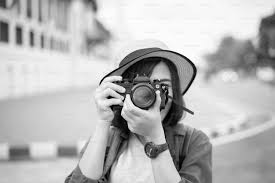

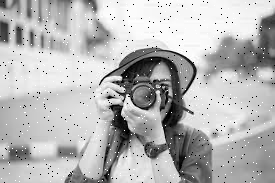

In [ ]:
import random
import cv2
from google.colab.patches import cv2_imshow

def add_noise(img):
    row, col = img.shape
    number_of_pixels = random.randint(1, 50000)

    # Adding white noise (255)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    # Adding black noise (0)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 0

    return img

# Load and process the image
img = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)  # Show original image

img_noise = add_noise(img.copy())  # Ensure original image is not modified
cv2_imshow(img_noise)  # Show noisy image


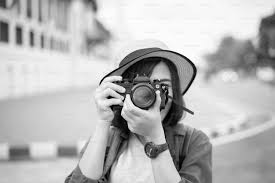

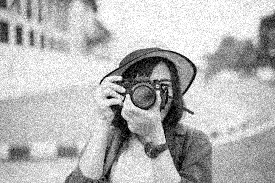

In [ ]:
import cv2
import numpy as np
image = cv2.imread('/content/sample_data/images.jpeg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
mean = 0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noise=np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
cv2_imshow(noise)

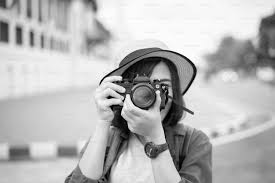

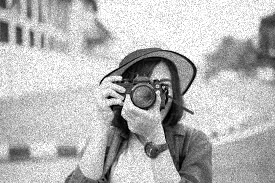

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image in grayscale
image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

# Function to generate speckle noise
def generate_speckle_noise(image_shape, mean=0, variance=0.01):
    noise = np.random.normal(mean, np.sqrt(variance), image_shape)
    speckle_noise = noise * np.ones(image_shape)  # Multiplying by ones doesn't change noise, can be removed
    return speckle_noise

# Generate speckle noise
speckle_noise = generate_speckle_noise(image.shape, mean=0, variance=0.01)

# Add noise to the image
noisy_image = image + speckle_noise * image  # Speckle noise is multiplicative
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display noisy image
cv2_imshow(noisy_image)
cv2.imwrite('/content/sample_data/noicy.jpeg', noisy_image)


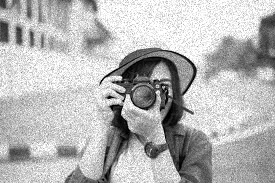

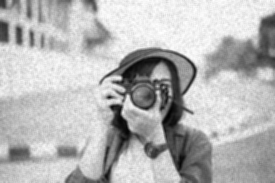

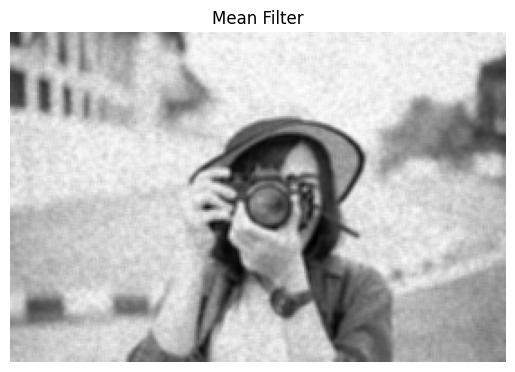

In [ ]:
#mean filtering

import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/noicy.jpeg', cv2.IMREAD_GRAYSCALE)
mean_filter = cv2.blur(image, (3,3))
cv2_imshow(image)
cv2_imshow(mean_filter)
import matplotlib.pyplot as plt
plt.imshow(mean_filter, cmap='gray')
plt.title('Mean Filter')
plt.axis('off')
plt.show()


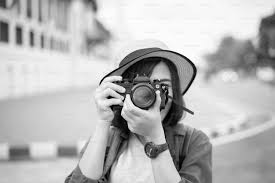

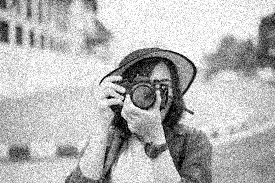

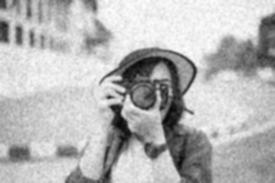

In [ ]:
#Gausina filtering

# The formula for a Gaussian kernel used in Gaussian filtering (smoothing) is given by:
# G(x, y) 1 /2πσ^2 e^(x^2+y^2)/2σ2)
# where:
# G(x, y) is the Gaussian function.
# o is the standard deviation, which controls the spread of the Gaussian.
# x and y are the pixel coordinates relative to the kernel center.
# e is Euler's number (~2.718).
# 2πσ2 is a normalization factor ensuring the kernel sums to 1.
# This kernel is convolved with an image to apply Gaussian blurring, effectively reducing noise and smoothing details.

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
mean=0.5
std_dev=25
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noise=np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
gaussian_filter = cv2.GaussianBlur(noise, (5,5), 0)
cv2_imshow(image)
cv2_imshow(noise)
cv2_imshow(gaussian_filter)



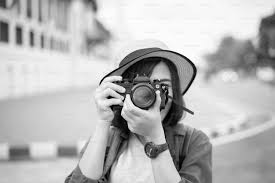

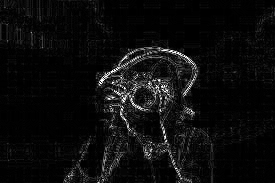

In [ ]:
# Laplacial filter

import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
laplacian_filter = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filter = cv2.convertScaleAbs(laplacian_filter)
cv2_imshow(image)
cv2_imshow(laplacian_filter)

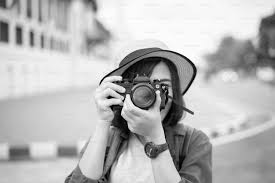

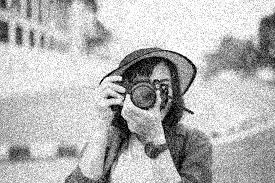

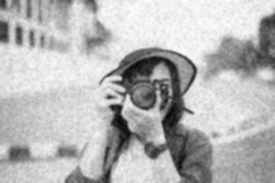

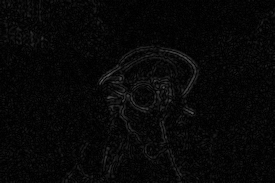

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image in grayscale
image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)

# Generate Gaussian noise
mean = 0.5
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, image.shape)

# Add noise and clip values
noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

# Apply Gaussian filtering
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Laplacian filter
laplacian_filtered = cv2.Laplacian(gaussian_filtered, cv2.CV_64F)
laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)

# Display images
cv2_imshow(image)                 # Original Image
cv2_imshow(noisy_image)           # Noisy Image
cv2_imshow(gaussian_filtered)     # After Gaussian Filtering
cv2_imshow(laplacian_filtered)    # After Laplacian Filtering


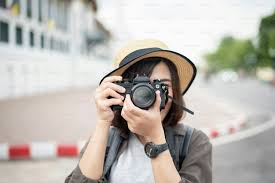

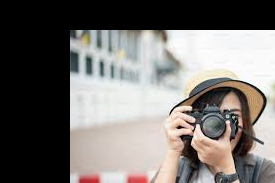

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')


tx = 70
ty = 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
cv2_imshow(image)
cv2_imshow(image_translation)

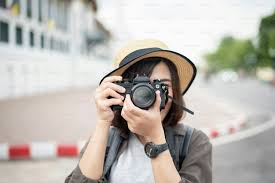

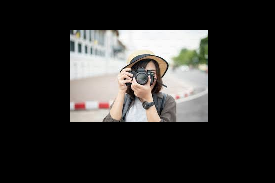

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')


tx = 70
ty = 30
translation_matrix = np.float32([[0.5, 0, tx], [0, 0.5, ty]])
image_translation = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
cv2_imshow(image)
cv2_imshow(image_translation)

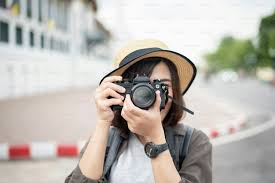

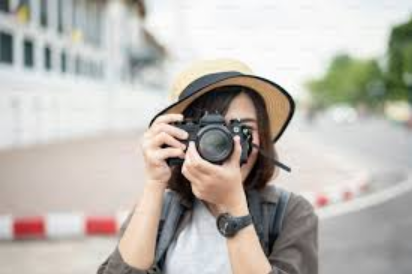

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')


sx,sy = 1.5,1.5
scaled_image = cv2.resize(image,None,fx = sx,fy = sy,interpolation=cv2.INTER_LINEAR)
cv2_imshow(image)
cv2_imshow(scaled_image )


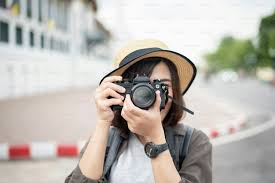

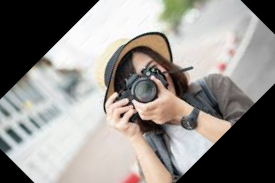

In [4]:
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/sample_data/images.jpeg')
center = (image.shape[1]//2,image.shape[0]//2)
angle = 45
scale = 1
rotation_matrix = cv2.getRotationMatrix2D(center,angle,scale)
rotated_image = cv2.warpAffine(image,rotation_matrix,(image.shape[1],image.shape[0]))
cv2_imshow(image)
cv2_imshow(rotated_image)

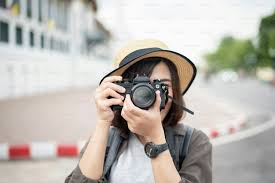

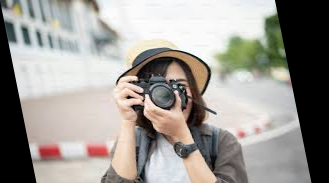

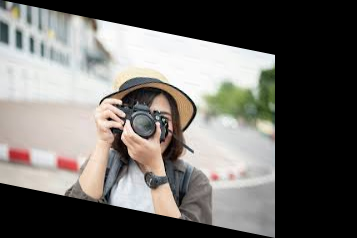

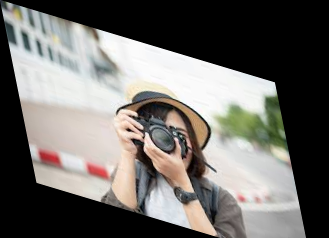

In [9]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')
rows,cols = image.shape[:2]
shx = 0.3
shy = 0.2

# Define shear_matrix_x and shear_matrix_y (same as before)
shear_matrix_x = np.float32([[1,shy,0],[0,1,0]])
shear_matrix_y = np.float32([[1,0,0],[shy,1,0]])

# Define shear_matrix_z for combined shear
shear_matrix_z = np.float32([[1, shy, 0], [shx, 1, 0]])  # Define shear_matrix_z

# Perform the warpAffine operations
sheared_image_x = cv2.warpAffine(image,shear_matrix_x,(int(cols+shx*rows),rows))
sheared_image_y = cv2.warpAffine(image,shear_matrix_y,(int(cols+shx*cols),int(rows+shy*cols)))
sheared_image_z = cv2.warpAffine(image, shear_matrix_z, (int(cols + shx * rows), int(rows + shy * cols)))

# Display the images
cv2_imshow(image)
cv2_imshow(sheared_image_x)
cv2_imshow(sheared_image_y)
cv2_imshow(sheared_image_z)